<a href="https://colab.research.google.com/github/Sarraalii/Machine-Learning-Proj/blob/main/Motion%20to%20predict%20activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch as t

import warnings
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler


In [20]:
warnings.filterwarnings('ignore')

# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
data = pd.read_csv(file_path)


data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [3]:
# Group the dataset by the 'subject' column and apply the `len` function
# to each group. This counts the number of records for each patient.
# The result is a series where the index is 'subject and the value is the count of records.
persub = data.groupby('subject').size()

print(persub.head())


subject
subject1    71082
dtype: int64


In [4]:
unique_subjects_all = data['subject'].unique()
print("Unique subjects in the entire dataset:", unique_subjects_all)


Unique subjects in the entire dataset: ['subject1' nan]


In [5]:
#check for missing
missing_counts = data.isnull().sum()

print(missing_counts)


alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         1
Activity    1
subject     1
dtype: int64


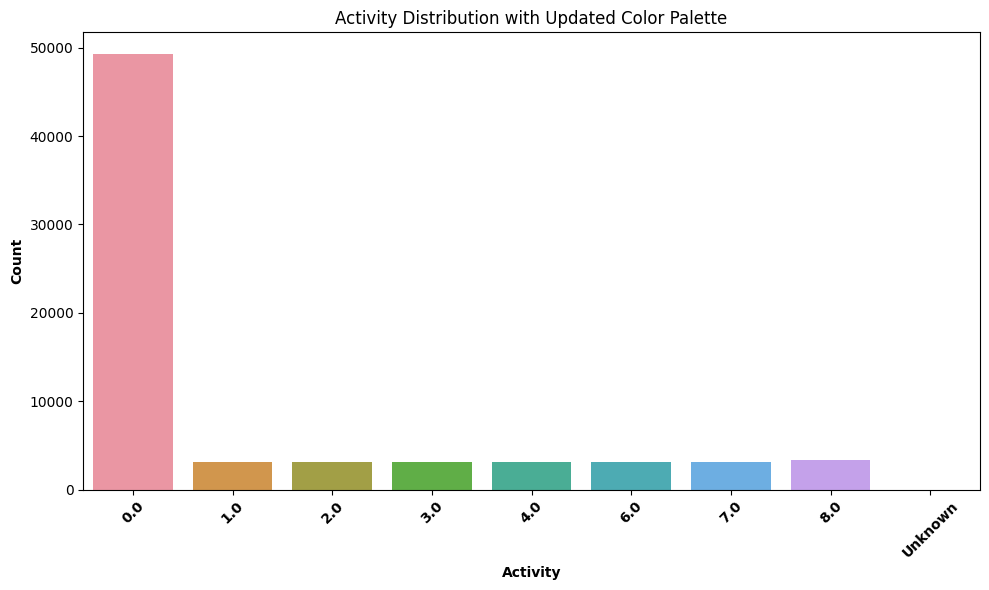

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named 'health_data'
# Replace any missing values in 'Activity' with 'Unknown'
data['Activity'].fillna('Unknown', inplace=True)

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Activity Distribution with updated color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=data)
plt.title('Activity Distribution with Updated Color Palette')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_activity_distribution_fig = plt.gcf()
plt.show()


In [7]:
print("Unique values before filtering:", data['Activity'].unique())
data_no_0 = data[data['Activity'] != 0]
print("Unique values after filtering:", data_no_0['Activity'].unique())


Unique values before filtering: [0.0 1.0 2.0 3.0 4.0 6.0 7.0 8.0 'Unknown']
Unique values after filtering: [1.0 2.0 3.0 4.0 6.0 7.0 8.0 'Unknown']


In [9]:
data['anyactivity'] = data['Activity'].apply(lambda x: 0 if x == 0 else 1)

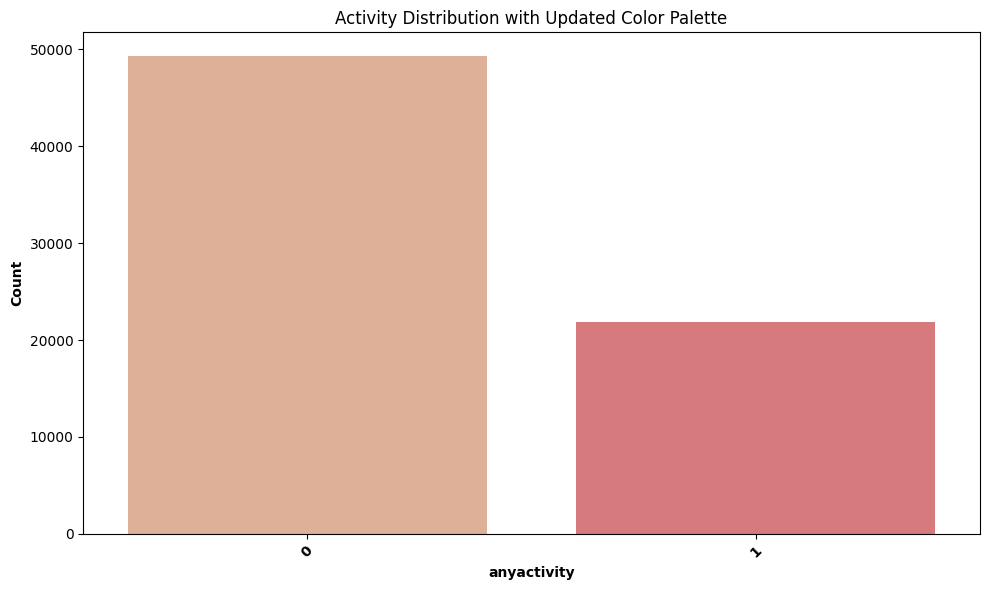

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named 'health_data'
# Replace any missing values in 'Activity' with 'Unknown'
data['anyactivity'].fillna('Unknown', inplace=True)

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Activity Distribution with updated color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='anyactivity', data=data)
plt.title('Activity Distribution with Updated Color Palette')
plt.xlabel('anyactivity', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_activity_distribution_fig = plt.gcf()
plt.show()

In [11]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Separate the majority class (not 'Activity 1') and the minority class ('Activity 1')
majority_class = data[data['Activity'] != 1]
minority_class = data[data['Activity'] == 1]

# Oversample the minority class to match the number of records in the majority class
oversampled_minority_class = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([oversampled_minority_class, majority_class], axis=0)

# Shuffle the combined dataset to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



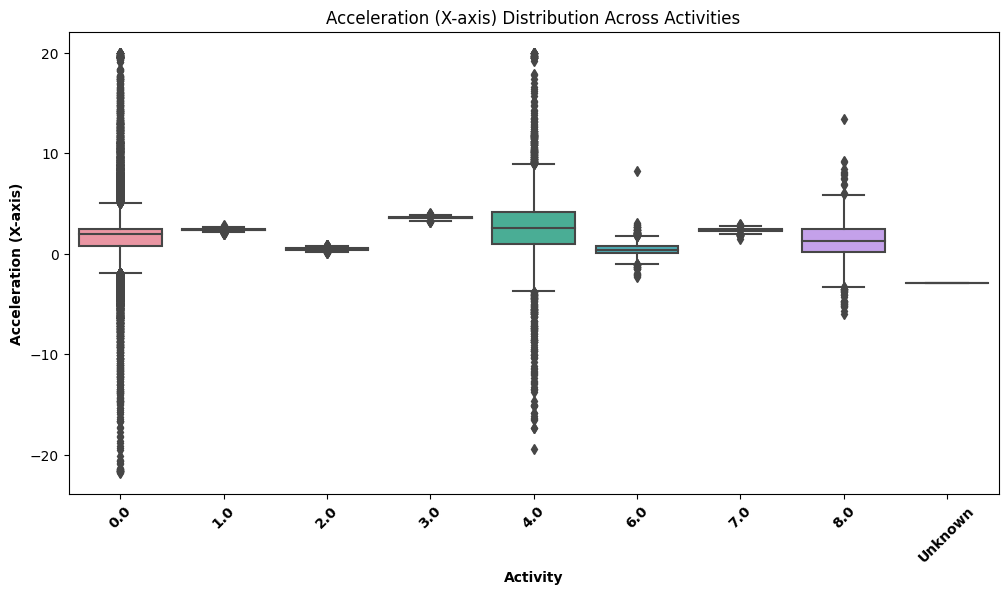

In [12]:
#exploring acceleration measurements for the X-axis across different activities:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='alx', data=data)
plt.title('Acceleration (X-axis) Distribution Across Activities')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('Acceleration (X-axis)', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.show()


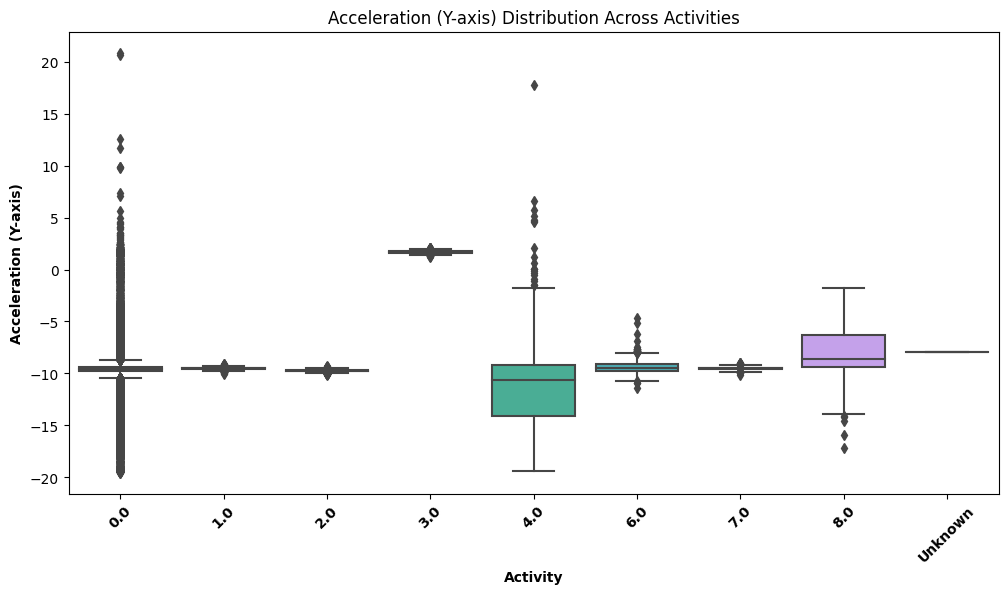

In [13]:
##exploring acceleration measurements Left-Ankle Sensor (Y-axis):

plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='aly', data=data)
plt.title('Acceleration (Y-axis) Distribution Across Activities')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('Acceleration (Y-axis)', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.show()


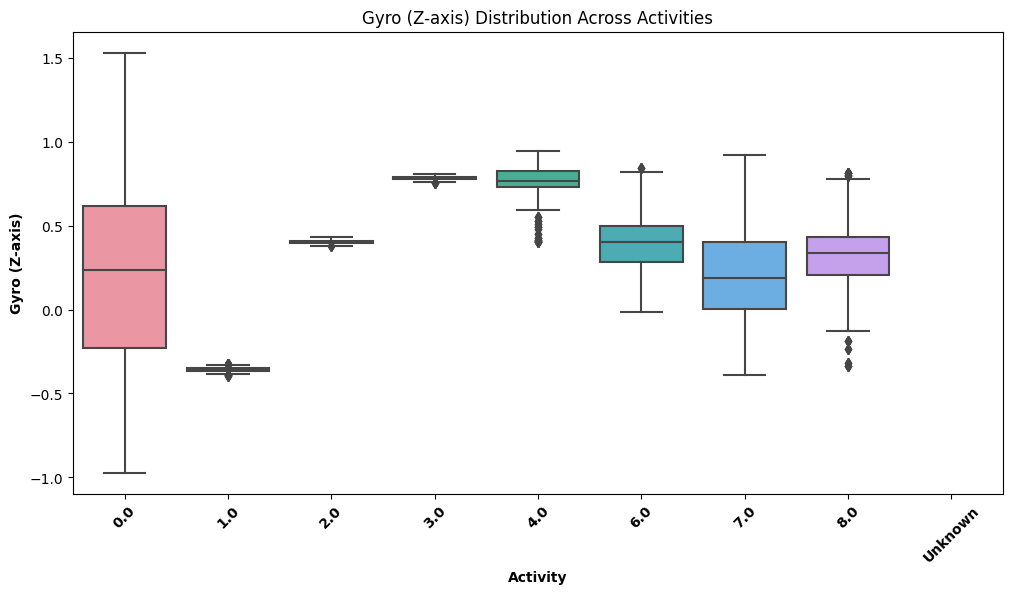

In [14]:
##exploring acceleration measurements Right-Lower-Arm Sensor (Z-axis)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='grz', data=data)
plt.title('Gyro (Z-axis) Distribution Across Activities')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('Gyro (Z-axis)', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.show()


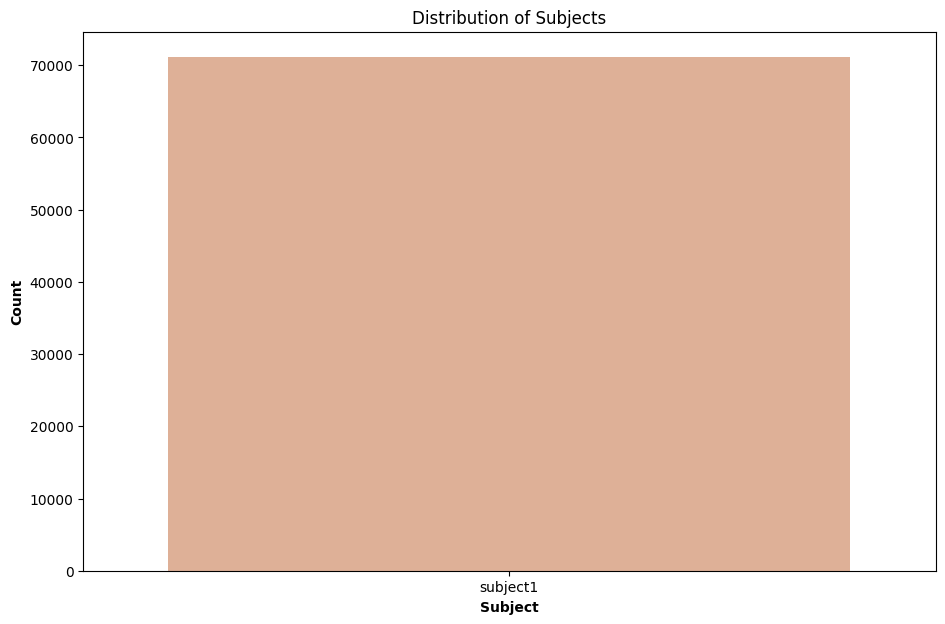

In [15]:
plt.figure(figsize=(11, 7))
sns.countplot(x='subject', data=data)
plt.title('Distribution of Subjects')
plt.xlabel('Subject', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()


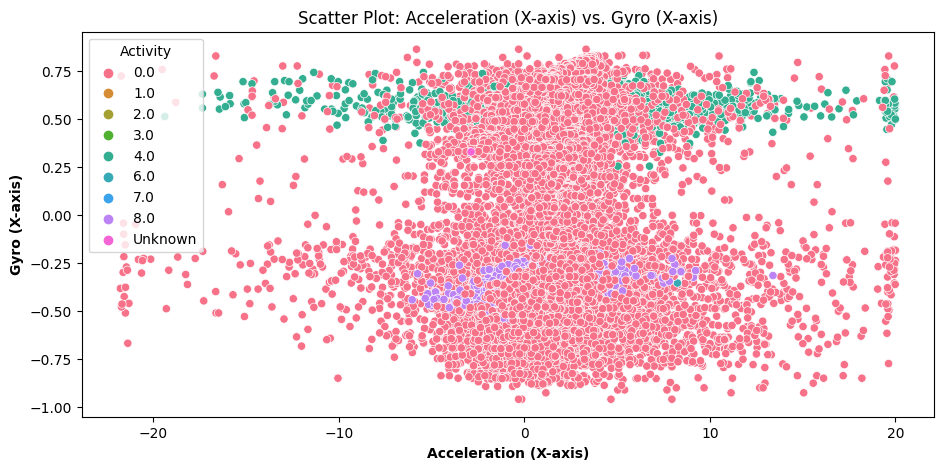

In [16]:
#Scatter Plot: Acceleration (X-axis) vs. Gyro (X-axis)
plt.figure(figsize=(11, 5))
sns.scatterplot(x='alx', y='glx', data=data, hue='Activity')
plt.title('Scatter Plot: Acceleration (X-axis) vs. Gyro (X-axis)')
plt.xlabel('Acceleration (X-axis)', fontweight='bold')
plt.ylabel('Gyro (X-axis)', fontweight='bold')
plt.show()
#makes sense since activity 0 is the majority

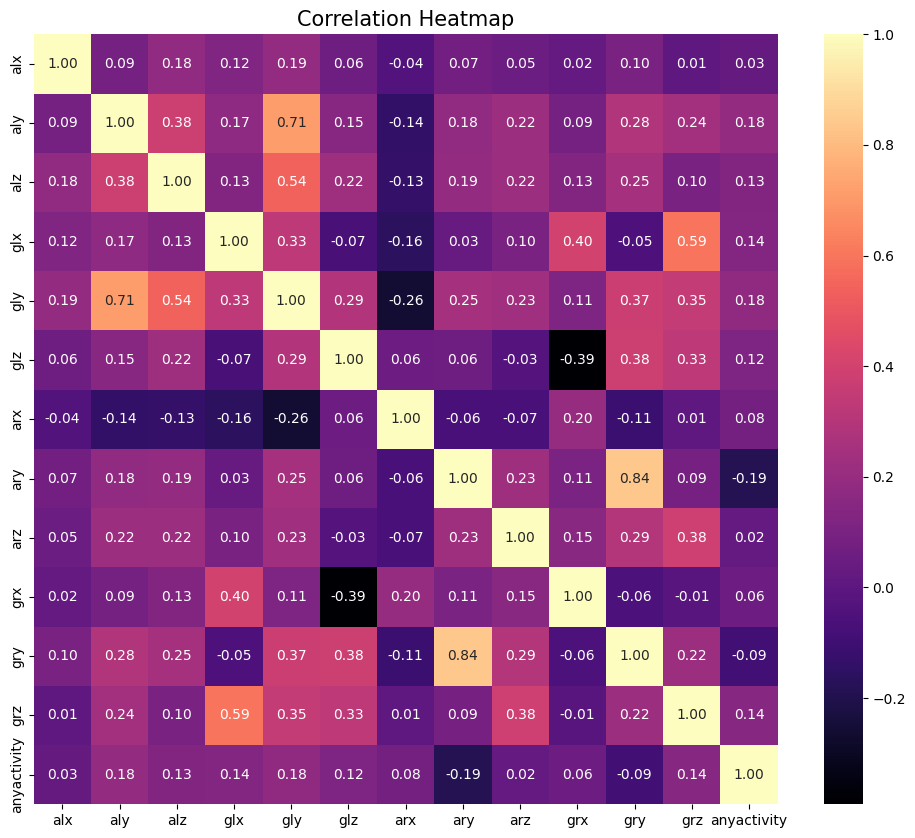

In [17]:
import numpy as np

# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with '_id' in their names.
numerical_features = [
    col for col in data.select_dtypes(include=[np.number]).columns
]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = data[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = le.fit_transform(data['subject'])


In [21]:
# Extract the numeric part from the 'subject' column and convert to integers
data['subject'] = data['subject'].str.extract('(\d+)').astype(int)

# Define the subjects for the training and test sets
train_subjects = [1, 2, 3, 4, 5]
test_subjects = [6, 7, 8, 9]

# Filter the main dataset based on the selected subjects for training and testing
train_data = data[data['subject'].isin(train_subjects)]
test_data = data[data['subject'].isin(test_subjects)]

# Check the sizes of the train and test sets
print("Train set size:", len(train_data))
print("Test set size:", len(test_data))

Train set size: 650497
Test set size: 349502


In [38]:
# Identifying numerical columns (excluding 'Activity')
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


In [39]:
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

In [78]:
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_data, sequence_length=100)
X_test, y_test = create_sequences(test_data, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6504, 100, 12), (6504,), (3495, 100, 12), (3495,))

In [41]:
data_types = data.dtypes
print(data_types)



alx                     float64
aly                     float64
alz                     float64
glx                     float64
gly                     float64
glz                     float64
arx                     float64
ary                     float64
arz                     float64
grx                     float64
gry                     float64
grz                     float64
Activity                  int64
subject                   int64
Subject_LabelEncoded      int64
df_encoded                int64
dtype: object


In [42]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Separate the majority class (not 'Activity 1') and the minority class ('Activity 1')
majority_class = data[data['Activity'] != 1]
minority_class = data[data['Activity'] == 1]

# Oversample the minority class to match the number of records in the majority class
oversampled_minority_class = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([oversampled_minority_class, majority_class], axis=0)

# Shuffle the combined dataset to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



In [50]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Separate the majority class (not 'Activity 1') and the minority class ('Activity 1')
majority_class = data[data['Activity'] != 1]
minority_class = data[data['Activity'] == 1]

# Oversample the minority class to match the number of records in the majority class
oversampled_minority_class = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([oversampled_minority_class, majority_class], axis=0)

# Shuffle the combined dataset to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



In [54]:
# Reassembling the balanced training dataset
train_df_balanced = balanced_data

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('subject').apply(lambda x : x.iloc[-1]['Activity']).value_counts())

1.0    6
0.0    3
dtype: int64


In [55]:
train_df_balanced

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,Subject_LabelEncoded,df_encoded
0,1.19950,-5.0457,-7.54240,-0.506490,-0.70169,-0.56582,4.44600,-10.470000,6.95560,-0.056863,-0.45996,1.00650,0,3,2,2
1,4.88050,1.1152,8.55250,0.447120,1.00560,0.44990,-6.84590,-0.001355,6.86450,-0.376470,0.58522,0.86422,3,6,5,5
2,-0.64946,-9.6140,1.97110,-0.486090,-0.58349,0.61297,-0.89604,-9.556100,1.38680,-0.715690,-0.78645,0.27155,1,4,3,3
3,0.72049,-9.7416,1.08260,0.630800,-0.70544,0.20236,-3.02760,-9.010800,1.92450,0.052941,-0.76591,0.91595,1,2,1,1
4,-0.73571,-9.6986,1.42440,-0.489800,-0.62477,0.60707,-0.77692,-9.615600,1.43590,-0.717650,-0.79877,0.15733,1,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944697,1.52720,-9.6113,0.25346,-0.632650,-0.25516,0.66012,-2.79370,-9.703100,-0.30807,-0.766670,-0.22382,-0.33836,1,8,7,7
1944698,1.71660,-9.7356,0.69705,0.413730,-0.78049,-0.58939,-14.54000,-4.877200,-2.72300,-0.611760,-0.71253,-0.49784,0,4,3,3
1944699,2.27240,-9.4510,0.44601,-0.218920,-0.89118,-0.50491,-3.19530,-9.051400,1.85990,-0.070588,-0.91992,-0.36853,1,1,0,0
1944700,0.63661,-9.7039,0.89617,-0.571430,-0.76360,0.33595,-2.90570,-9.370200,0.97941,-0.800000,-0.71253,-0.16595,1,9,8,8


In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Padding sequences
max_length = max(len(s) for s in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', dtype='float')

# Convert NumPy array to TensorFlow tensor
tf_padded_sequences = tf.convert_to_tensor(padded_sequences, dtype=tf.float32)

print(tf_padded_sequences.shape)


(9, 265619, 14)


In [58]:
#Testing sequences

# Group by 'patient_nbr' and create sequences
grouped_test = test_data.groupby('subject', sort=False)
sequences_test = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped_test]
targets_test = [group['Activity'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Padding sequences for the test set
padded_sequences_test = pad_sequences(sequences_test, maxlen=5, padding='post', dtype='float')

padded_sequences_test.shape

(4, 5, 12)

In [61]:
print(padded_sequences.shape)


(9, 5, 14)


In [62]:
input_size = padded_sequences.shape[2]
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)


In [64]:
print("RNN Output size:", out.size())


RNN Output size: torch.Size([9, 3])


In [66]:
print("Shape of input data:", X.shape)


Shape of input data: torch.Size([4, 5, 12])


In [89]:
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_data, sequence_length=100)
X_test, y_test = create_sequences(test_data, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6504, 100, 12), (6504,), (3495, 100, 12), (3495,))

In [92]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Modify num_classes based on the actual number of classes in your data
num_classes = len(np.unique(y_train))

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layer and additional fully connected layers
rnn_layer1 = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)
fc_layer2 = nn.Linear(hidden_size // 2, num_classes)

# Dropout layer
dropout_fc = nn.Dropout(0.2)

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Take the last time step's output
        out = relu(fc_layer1(out))
        out = dropout_fc(out)
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Take the last time step's output
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            predicted = t.clamp(predicted, 0, num_classes - 1)  # Ensure predicted labels are within the correct range
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Take the last time step's output
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            predicted = t.clamp(predicted, 0, num_classes - 1)  # Ensure predicted labels are within the correct range
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/30 ---> Train Accuracy: 3.7515375153751536%, Validation Accuracy: 3.977110157367668%
Epoch 1/30 ---> Train Accuracy: 35.070725707257075%, Validation Accuracy: 39.71387696709585%
Epoch 2/30 ---> Train Accuracy: 73.32410824108241%, Validation Accuracy: 70.70100143061516%
Epoch 3/30 ---> Train Accuracy: 74.1389913899139%, Validation Accuracy: 71.04434907010014%
Epoch 4/30 ---> Train Accuracy: 73.87761377613776%, Validation Accuracy: 71.04434907010014%
Epoch 5/30 ---> Train Accuracy: 74.1389913899139%, Validation Accuracy: 70.95851216022889%
Epoch 6/30 ---> Train Accuracy: 74.07749077490774%, Validation Accuracy: 70.95851216022889%
Epoch 7/30 ---> Train Accuracy: 73.93911439114392%, Validation Accuracy: 71.5307582260372%
Epoch 8/30 ---> Train Accuracy: 73.66236162361623%, Validation Accuracy: 71.18741058655222%
Epoch 9/30 ---> Train Accuracy: 73.09348093480935%, Validation Accuracy: 69.35622317596567%
Epoch 10/30 ---> Train Accuracy: 70.9870848708487%, Validation Accuracy: 63.06151

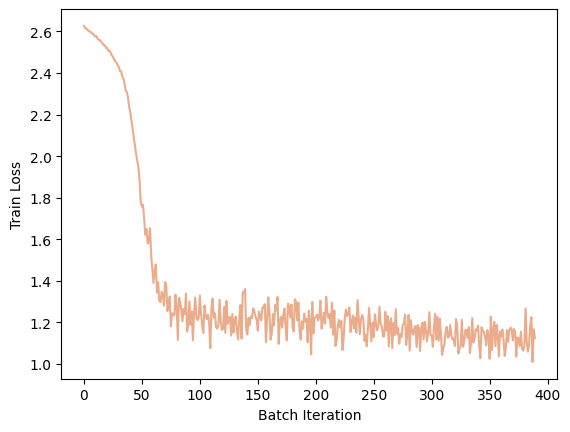

In [93]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

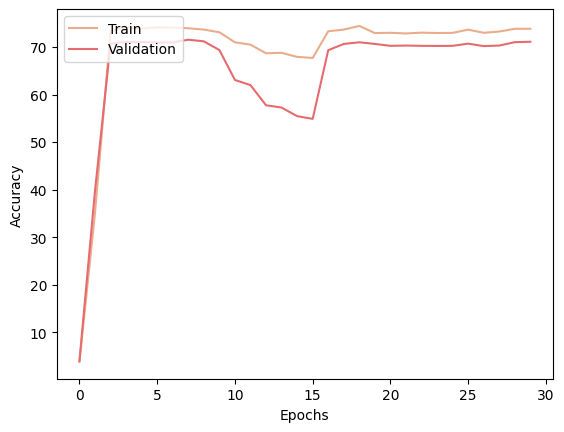

In [94]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# ... (previous code)

# Lists to store accuracies, losses, precision, and recall
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
train_precision_list = []
validation_precision_list = []
train_recall_list = []
validation_recall_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    per_epoch_targets = []
    per_epoch_predictions = []

    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Take the last time step's output
        out = relu(fc_layer1(out))
        out = dropout_fc(out)
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()



In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# ... (previous code)

# Lists to store accuracies, losses, precision, and recall
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []
train_precision_list = []
validation_precision_list = []
train_recall_list = []
validation_recall_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9

    optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    per_epoch_targets = []
    per_epoch_predictions = []

    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]  # Take the last time step's output
        out = relu(fc_layer1(out))
        out = dropout_fc(out)
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()

        # Store targets and predictions for later evaluation
        _, predicted = t.max(out.data, 1)
        per_epoch_targets.extend(Y.cpu().numpy())
        per_epoch_predictions.extend(predicted.cpu().numpy())

    all_loss += per_epoch_loss_list

    # Evaluation on training data
    train_accuracy = accuracy_score(per_epoch_targets, per_epoch_predictions)
    train_precision = precision_score(per_epoch_targets, per_epoch_predictions, average='weighted')
    train_recall = recall_score(per_epoch_targets, per_epoch_predictions, average='weighted')

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)

    # Validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        per_epoch_targets_val = []
        per_epoch_predictions_val = []

        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]  # Take the last time step's output
            out = relu(fc_layer1(out))
            out = fc_layer2(out)

            # Store targets and predictions for later evaluation
            _, predicted = t.max(out.data, 1)
            per_epoch_targets_val.extend(Y.cpu().numpy())
            per_epoch_predictions_val.extend(predicted.cpu().numpy())

        # Calculate metrics for validation
        validation_accuracy = accuracy_score(per_epoch_targets_val, per_epoch_predictions_val)
        validation_precision = precision_score(per_epoch_targets_val, per_epoch_predictions_val, average='weighted')
        validation_recall = recall_score(per_epoch_targets_val, per_epoch_predictions_val, average='weighted')

        validation_accuracy_list.append(validation_accuracy)
        validation_precision_list.append(validation_precision)
        validation_recall_list.append(validation_recall)

        # Print metrics for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> '
              f'Train Accuracy: {train_accuracy:.2f}, Train Precision: {train_precision:.2f}, Train Recall: {train_recall:.2f} | '
              f'Validation Accuracy: {validation_accuracy:.2f}, Validation Precision: {validation_precision:.2f}, Validation Recall: {validation_recall:.2f}')

# Print final results
print(f'Final Training Accuracy: {train_accuracy:.2f}, Final Training Precision: {train_precision:.2f}, Final Training Recall: {train_recall:.2f}')
print(f'Final Validation Accuracy: {validation_accuracy:.2f}, Final Validation Precision: {validation_precision:.2f}, Final Validation Recall: {validation_recall:.2f}')


Epoch 0/30 ---> Train Accuracy: 0.74, Train Precision: 0.57, Train Recall: 0.74 | Validation Accuracy: 0.71, Validation Precision: 0.54, Validation Recall: 0.71
Epoch 1/30 ---> Train Accuracy: 0.74, Train Precision: 0.57, Train Recall: 0.74 | Validation Accuracy: 0.71, Validation Precision: 0.54, Validation Recall: 0.71
Epoch 2/30 ---> Train Accuracy: 0.74, Train Precision: 0.57, Train Recall: 0.74 | Validation Accuracy: 0.71, Validation Precision: 0.54, Validation Recall: 0.71
Epoch 3/30 ---> Train Accuracy: 0.74, Train Precision: 0.57, Train Recall: 0.74 | Validation Accuracy: 0.71, Validation Precision: 0.54, Validation Recall: 0.71
Epoch 4/30 ---> Train Accuracy: 0.74, Train Precision: 0.57, Train Recall: 0.74 | Validation Accuracy: 0.71, Validation Precision: 0.54, Validation Recall: 0.71
Epoch 5/30 ---> Train Accuracy: 0.74, Train Precision: 0.57, Train Recall: 0.74 | Validation Accuracy: 0.71, Validation Precision: 0.54, Validation Recall: 0.71
Epoch 6/30 ---> Train Accuracy: 0.

In [100]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define your RNN model class
class YourRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(YourRNNModel, self).__init__()
        self.rnn_layer1 = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc_layer2 = nn.Linear(hidden_size // 2, num_classes)
        self.dropout_fc = nn.Dropout(0.2)
        self.relu = nn.ReLU()

    def forward(self, x):
        out, _ = self.rnn_layer1(x)
        out = out[:, -1, :]  # Take the last time step's output
        out = self.relu(self.fc_layer1(out))
        out = self.dropout_fc(out)
        out = self.fc_layer2(out)
        return out

# Assuming you have already defined X_train, y_train, and other variables

# Set hyperparameters
learning_rate = 0.0001
batch_size = 512
epochs = 30

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
cv_results = {'accuracy': [], 'precision': [], 'recall': []}

# Cross-validation loop
for train_index, val_index in kf.split(X_train):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create PyTorch datasets and data loaders for the fold
    train_fold_dataset = TensorDataset(t.tensor(X_train_fold, dtype=t.float32), t.tensor(y_train_fold, dtype=t.long))
    val_fold_dataset = TensorDataset(t.tensor(X_val_fold, dtype=t.float32), t.tensor(y_val_fold, dtype=t.long))

    train_fold_loader = DataLoader(train_fold_dataset, batch_size=batch_size, shuffle=True)
    val_fold_loader = DataLoader(val_fold_dataset, batch_size=batch_size, shuffle=False)

    # Define your RNN model
    model = YourRNNModel(input_size=X_train.shape[2], hidden_size=256, num_classes=3)
    optimizer = Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()

    # Train the model on the current fold
    for epoch in range(epochs):
        model.train()
        for X_train_batch, y_train_batch in train_fold_loader:
            optimizer.zero_grad()
            output = model(X_train_batch)
            loss = loss_fn(output, y_train_batch)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set for this fold
    model.eval()
    all_targets_val = []
    all_predictions_val = []
    with t.no_grad():
        for X_val_batch, y_val_batch in val_fold_loader:
            output_val = model(X_val_batch)
            _, predictions_val = t.max(output_val, 1)
            all_targets_val.extend(y_val_batch.cpu().numpy())
            all_predictions_val.extend(predictions_val.cpu().numpy())

    # Store the results for this fold
    cv_results['accuracy'].append(accuracy_score(all_targets_val, all_predictions_val))
    cv_results['precision'].append(precision_score(all_targets_val, all_predictions_val, average='weighted'))
    cv_results['recall'].append(recall_score(all_targets_val, all_predictions_val, average='weighted'))

# Print cross-validation results
print(f'Cross-Validation Accuracy: {np.mean(cv_results["accuracy"]):.2f}')
print(f'Cross-Validation Precision: {np.mean(cv_results["precision"]):.2f}')
print(f'Cross-Validation Recall: {np.mean(cv_results["recall"]):.2f}')


IndexError: ignored